<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/perceptron_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#single perceptron

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 42)
per_clf = Perceptron()
per_clf.fit(X_train, y_train)

print(per_clf.score(X_test, y_test))

1.0


Noticed the fact that the Perceptron learning algorithm strongly resem‐
bles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent
to using an SGDClassifier with the following hyperparameters: loss="perceptron" ,
learning_rate="constant" , eta0=1 (the learning rate), and penalty=None (no regu‐
larization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class
probability; rather, they just make predictions based on a hard threshold. This is one
of the good reasons to prefer Logistic Regression over Perceptrons.

# Activation Function
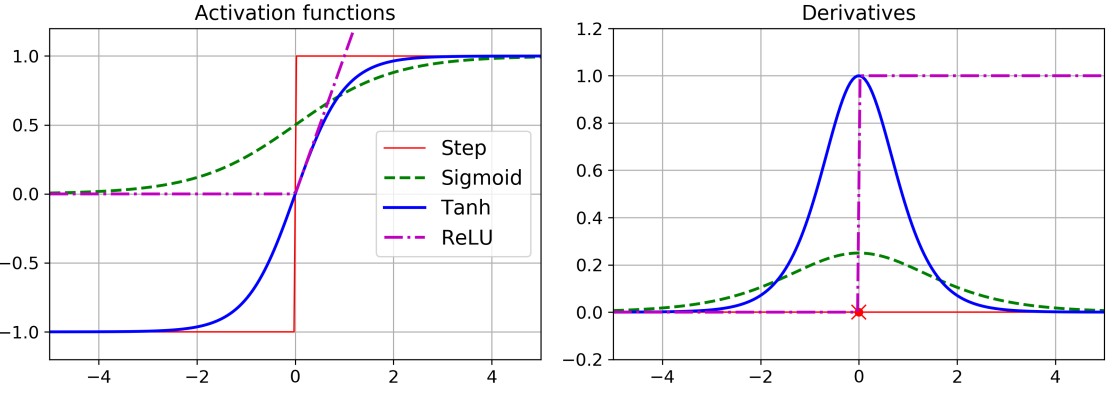

**Typical regression MLP architecture**

1. input neiron: one per input feature (784 for MNIST)
2. hidden layer: depends on problem, 1-5
3. neurons/ hideen layer: depeds on problem; 10-100
4. output neuron: 1/ dimension
5. hidden activation: ReLU/ SELU
6. Output activation None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)
7. Loss function MSE or MAE/Huber (if outliers)

In [9]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
      X_train_full= X_train_full/255.0
      X_valid, X_train= X_train_full[:5000], X_train_full[5000:]
      y_valid, y_train= y_train_full[:5000], y_train_full[5000:]
      

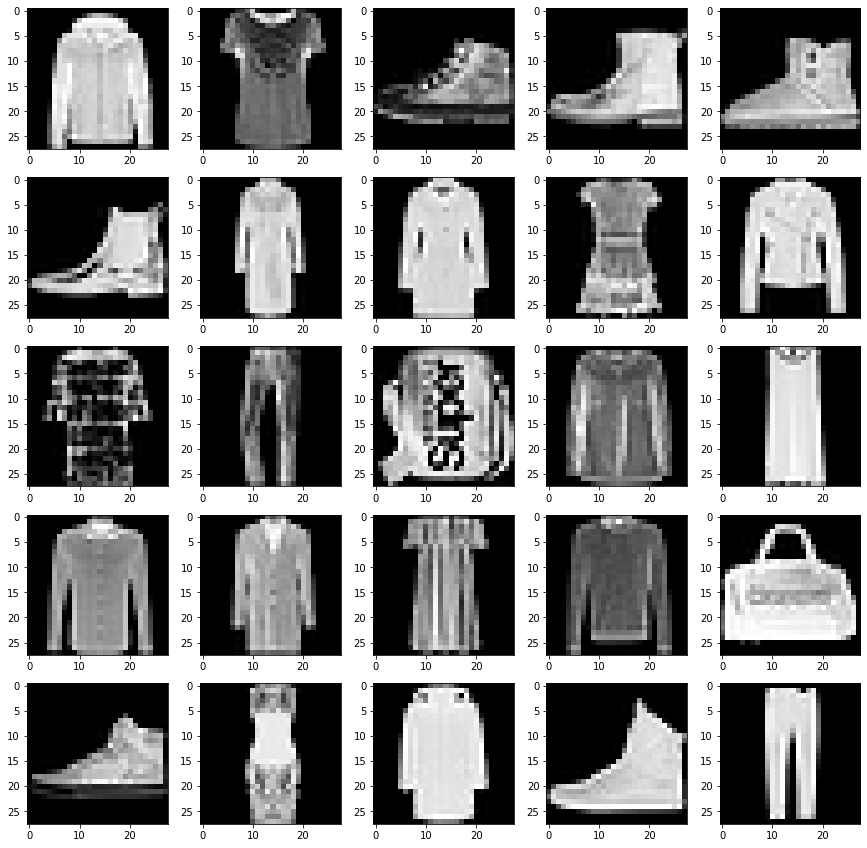

In [18]:
#visualizeing
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
  first_image = X_train[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.subplot(5,5,i+1)
  plt.imshow(pixels, cmap='gray')
  
plt.show()

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#making out ANN
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #to flatten the input in 1D array
model.add(keras.layers.Dense(300, activation="relu")) #dense layer with 300 neurons and ReLU activation
model.add(keras.layers.Dense(100, activation="relu")) #dense layer with 300 neurons and ReLU activation
model.add(keras.layers.Dense(10, activation="softmax")) #dense layer with 10 neurons and Softmax activation since classes are exclusive

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

dense


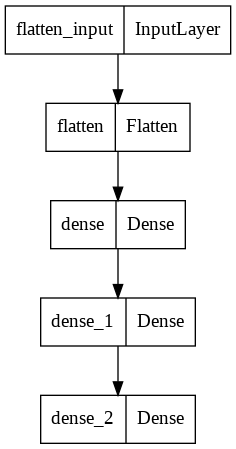

In [23]:
print(model.layers[1].name)

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [27]:
hidden1=model.layers[1]
weights, biases = hidden1.get_weights()
print(weights[:3, :2])
print(weights.shape)
print(biases[:7])
print(biases.shape)

[[-0.01163158  0.03353158]
 [ 0.04302361 -0.0159924 ]
 [-0.03294466  0.01553579]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0.]
(300,)


In [28]:
# weights were initialized randomly which is needed to break symmetry 
# biases were initialzed 0 which is fine

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

* we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. 

* If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. 
* If we were doing binary classi‐
fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss

In [29]:
history = model.fit(X_train, y_train, epochs=30,
              validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7190 - accuracy: 0.7605 - val_loss: 0.5051 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4884 - accuracy: 0.8305 - val_loss: 0.4422 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4401 - accuracy: 0.8465 - val_loss: 0.4085 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4145 - accuracy: 0.8539 - val_loss: 0.3889 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3935 - accuracy: 0.8615 - val_loss: 0.3973 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8680 - val_loss: 0.3735 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3629 - accuracy: 0.8710 - val_loss: 0.3567 - val_accuracy:

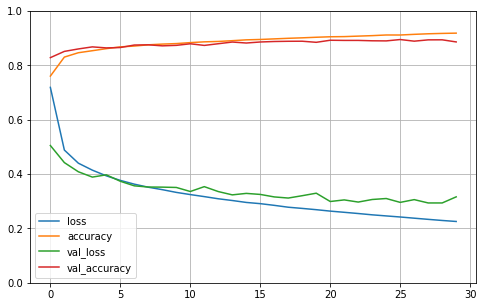

In [30]:
#visualising model history

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
## we can still continue learning by simple calling fit, with more epochs as loss yet hasn't converged

history = model.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2233 - accuracy: 0.9199 - val_loss: 0.2968 - val_accuracy: 0.8952
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2186 - accuracy: 0.9214 - val_loss: 0.2944 - val_accuracy: 0.8948
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2146 - accuracy: 0.9227 - val_loss: 0.3078 - val_accuracy: 0.8954
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2123 - accuracy: 0.9231 - val_loss: 0.3133 - val_accuracy: 0.8878
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2093 - accuracy: 0.9242 - val_loss: 0.3017 - val_accuracy: 0.8958
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2042 - accuracy: 0.9275 - val_loss: 0.2879 - val_accuracy: 0.8980
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2028 - accuracy: 0.9264 - val_loss: 0.2979 - val_accuracy:

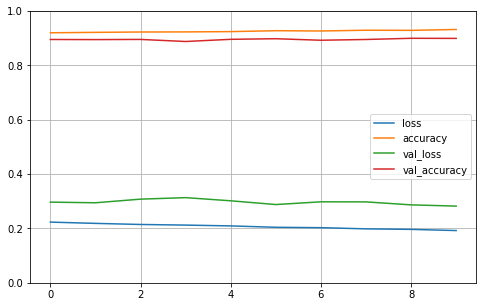

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
##as we can see, learning continued where it was left and we can stull train the model further
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 61.2776 - accuracy: 0.8602


[61.27762985229492, 0.8601999878883362]

In [41]:
y_pred = model.predict(X_test[:3])
y_pred=np.argmax(y_pred, axis=1)
print(y_pred, y_test[0:3])

[9 2 1] [9 2 1]
